In [1]:
from os import walk
from os.path import splitext
from collections import defaultdict, Counter

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from cleaner import TextCleaner
from data_processor import DataProcessor
text_cleaner = TextCleaner()
data_processor = DataProcessor()

# Filename data

### Clean text

1. Split text
2. Add POS tag
3. Lemmatize
4. Remove stopwords
5. Stem

In [4]:
filename_word_count = Counter()
for (root, dirs, files) in walk('./descriptions/alphago_news_us'):
    for file in files:
        filename = '_'.join(splitext(file)[0].split('_')[1:])
        words = text_cleaner.clean(filename)
        for word in words:
            filename_word_count[word] += 1

In [5]:
filename_df, log_filename_df = data_processor.process(filename_word_count)

In [6]:
filename_df.head()

,word,count,index
0,alphago,94,1
1,ai,92,2
2,googl,74,3
3,go,55,4
4,intellig,51,5


In [7]:
log_filename_df.head()

,word,count,index
0,alphago,4.543295,0.000000
1,ai,4.521789,0.693147
2,googl,4.304065,1.098612
3,go,4.007333,1.386294
4,intellig,3.931826,1.609438


### Plot it with Seaborn

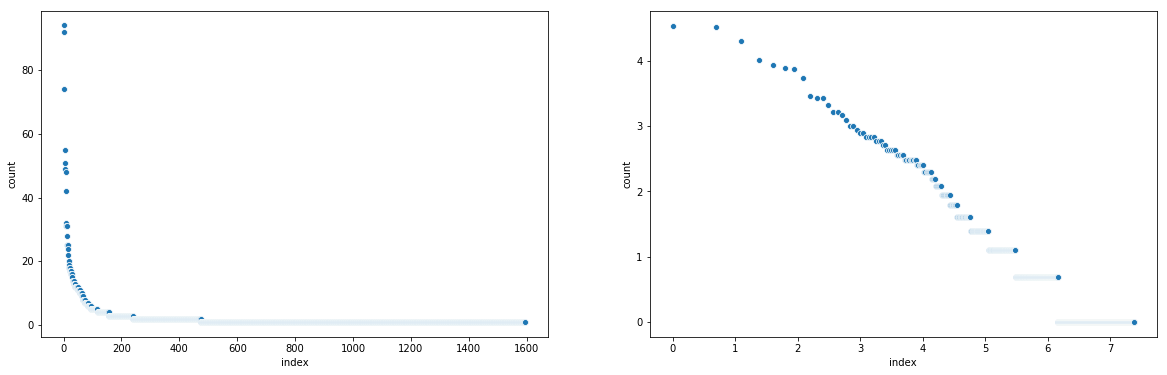

In [8]:
fig, axs = plt.subplots(figsize=(20, 6), ncols=2, nrows=1)
sns.scatterplot(x=filename_df['index'], y=filename_df['count'], ax=axs[0])
sns.scatterplot(x=log_filename_df['index'], y=log_filename_df['count'], ax=axs[1])

### Filter and sort the Series

In [9]:
filtered_filename_df = filename_df[log_filename_df['index'] > 2][log_filename_df['index'] < 4]
print ('filtered: %d' % filtered_filename_df['word'].count())
print ('total: %d' % filename_df['word'].count())
print ('percentage: %f' % (filtered_filename_df['word'].count() / filename_df['word'].count()))

filtered: 47
total: 1594
percentage: 0.029486


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### Output the medium popular words

In [10]:
with open('./wordcounts/filename.count', 'w+') as f:
    for idx, row in filtered_filename_df.iterrows():
        f.write('%d %s\n' % (row['count'], row['word']))

# Description data

In [27]:
description_word_count = Counter()
for (root, dirs, files) in walk('./descriptions/alphago_news_us'):
    for file in files:
        if not file.endswith('.txt'):
            continue
        with open('./descriptions/alphago_news_us/' + file) as f:
            words = text_cleaner.clean(f.read())
        n = int(file.split('_')[0])
        for word in words:
            if n > 250:
                if description_word_count[word] == 0:
                    continue
            description_word_count[word] += 1

In [12]:
description_df, log_description_df = data_processor.process(description_word_count)

In [13]:
description_df.head()

,word,count,index
0,http,2600,1
1,com,1934,2
2,www,1275,3
3,facebook,583,4
4,u,572,5


In [14]:
log_description_df.head()

,word,count,index
0,http,7.863267,0.000000
1,com,7.567346,0.693147
2,www,7.150701,1.098612
3,facebook,6.368187,1.386294
4,u,6.349139,1.609438


### Plot it with Seaborn

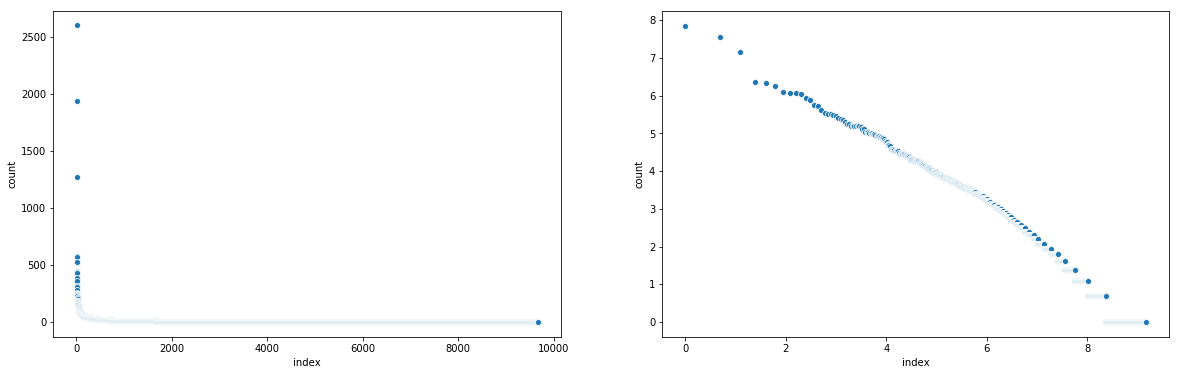

In [15]:
fig, axs = plt.subplots(figsize=(20, 6), ncols=2, nrows=1)
sns.scatterplot(x=description_df['index'], y=description_df['count'], ax=axs[0])
sns.scatterplot(x=log_description_df['index'], y=log_description_df['count'], ax=axs[1])

### Filter and sort the Series

In [16]:
filtered_description_df = description_df[log_description_df['index'] > 2][log_description_df['index'] < 4]
print ('filtered: %d' % filtered_description_df['word'].count())
print ('total: %d' % description_df['word'].count())
print ('percentage: %f' % (filtered_description_df['word'].count() / description_df['word'].count()))

filtered: 47
total: 9665
percentage: 0.004863


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### Output the medium popular words

In [17]:
with open('./wordcounts/description.count', 'w+') as f:
    for idx, row in filtered_description_df.iterrows():
        f.write('%d %s\n' % (row['count'], row['word']))

# Audio Data

In [18]:
audio_word_count = Counter()
for (root, dirs, files) in walk('./audios/alphago_news_us_text'):
    for file in files:
        if not file.endswith('.txt'):
            continue
        with open('./audios/alphago_news_us_text/' + file) as f:
            words = text_cleaner.clean(f.read())
        for word in words:
            audio_word_count[word] += 1

In [19]:
audio_df, log_audio_df = data_processor.process(audio_word_count)

In [20]:
audio_df.head()

,word,count,index
0,go,313,1
1,human,191,2
2,like,183,3
3,game,182,4
4,get,157,5


In [21]:
log_audio_df.head()

,word,count,index
0,go,5.746203,0.000000
1,human,5.252273,0.693147
2,like,5.209486,1.098612
3,game,5.204007,1.386294
4,get,5.056246,1.609438


### Plot it with Seaborn

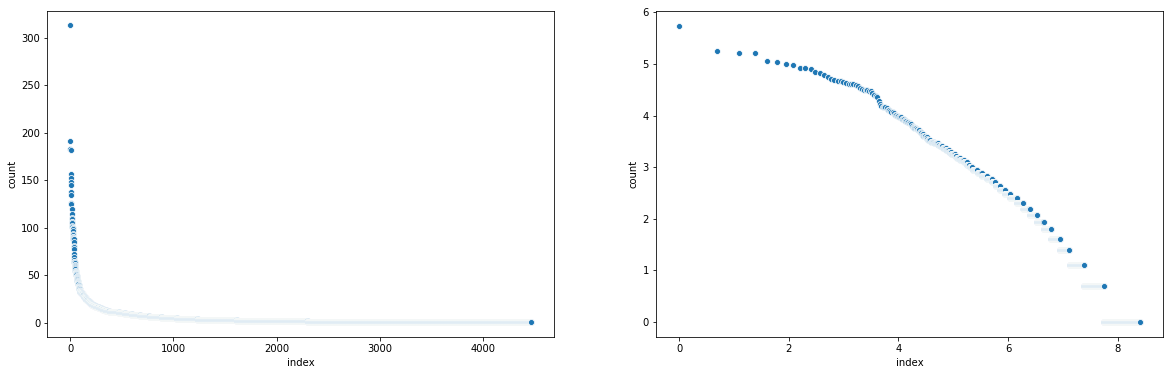

In [22]:
fig, axs = plt.subplots(figsize=(20, 6), ncols=2, nrows=1)
sns.scatterplot(x=audio_df['index'], y=audio_df['count'], ax=axs[0])
sns.scatterplot(x=log_audio_df['index'], y=log_audio_df['count'], ax=axs[1])

### Filter and sort the Series

In [23]:
filtered_audio_df = audio_df[log_audio_df['index'] > 4][log_audio_df['index'] < 6]
print ('filtered: %d' % filtered_audio_df['word'].count())
print ('total: %d' % audio_df['word'].count())
print ('percentage: %f' % (filtered_audio_df['word'].count() / audio_df['word'].count()))

filtered: 349
total: 4466
percentage: 0.078146


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### Output the medium popular words

In [24]:
with open('./wordcounts/audio.count', 'w+') as f:
    for idx, row in filtered_audio_df.iterrows():
        f.write('%d %s\n' % (row['count'], row['word']))

## TODO
- Stemming (Done)
- loglog plot (Done)
- some middle grounds words are particularly named entities
- transfer text from audio (to be fixed)
- Search literature for keywords selection for queries

### 11/8 TODO

- Look into the unusual (No.279) results (title, description, comments) if its a mistake